# Analysis Trump/Clinton Tweets - 2016

### Objective: Use statistics, some time series and machine learning to characterize 'tweeter speech' from Donald Trump/Hillary Clinton 

Analysis keypoints:
 1. Use tweepy to download the tweets authored by Donald Trump.
 2. Analysis of Hashtag frequency - What can we learn?
 3. Time series analysis - Number of tweets/correlation - Locate peaks
 4. Word histogram - What are the words more frequently used by either candidate? What can we learn?
 5. But... humans are biased, are they not? Can we do better? Use machine learning!
 6. What about unsupervised learning? Does a predictive model make sense?

In [1]:
#Import the data. The tweets were downloaded using Tweepy.
import json, glob
import datetime
import pandas as pd
from __future__ import division

In [2]:
dt_tweets_json = []
hc_tweets_json = []
for fn in glob.glob('data/*'):
    with open(fn, 'r') as f:
        if 'Clinton' in fn:
            for line in f:
                hc_tweets_json.append(json.loads(line))
        else:
            for line in f:
                dt_tweets_json.append(json.loads(line))

df_dt = pd.DataFrame(dt_tweets_json).drop_duplicates(subset='id_str', keep='last')
df_dt = df_dt.set_index('id_str', inplace=False)
df_hc = pd.DataFrame(hc_tweets_json).drop_duplicates(subset='id_str', keep='last')
df_hc = df_hc.set_index('id_str', inplace=False)

In [3]:
to_datetime = lambda x: datetime.datetime.strptime(x, "%a %b %d %H:%M:%S +0000 %Y")
df_dt['created_at'] = df_dt['created_at'].apply(to_datetime)
df_hc['created_at'] = df_hc['created_at'].apply(to_datetime)

In [4]:
df_hc.head(3)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,in_reply_to_screen_name,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
id_str,,,,,,,,,,,,,,,,,,,,,
751245220222689280,None,None,2016-07-08 02:43:12,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,2582,False,None,751245220222689280,None,...,NaN,NaN,NaN,763,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",We have a responsibility to fight for the next...,False,"{u'follow_request_sent': False, u'has_extended..."
751237421040275456,None,None,2016-07-08 02:12:13,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,None,751237421040275456,None,...,NaN,NaN,NaN,253,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @mpshapiro: See new @Hillaryclinton plan to...,False,"{u'follow_request_sent': False, u'has_extended..."
751199631728607232,None,None,2016-07-07 23:42:03,"{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'http://twitter...,9107,False,None,751199631728607232,None,...,NaN,NaN,NaN,4361,False,NaN,"<a href=""https://about.twitter.com/products/tw...",Too many African American families are mournin...,False,"{u'follow_request_sent': False, u'has_extended..."


## 2. Temporal analysis - Who tweets the most?

In [5]:
#Extract number of tweets per date, create dictionaries with information.
from collections import Counter

hc_tweets_per_day = Counter([x.date() for x in df_hc.created_at if x.year > 2015])
dt_tweets_per_day = Counter([x.date() for x in df_dt.created_at if x.year > 2015])
hc_tweets_per_day_noRT = Counter([x.date() for x in df_hc[['RT ' not in x for x in df_hc.text.values]].created_at if x.year > 2015])
dt_tweets_per_day_noRT = Counter([x.date() for x in df_dt[['RT ' not in x for x in df_dt.text.values]].created_at if x.year > 2015])
hc_tweets_per_day_only_RT = Counter([x.date() for x in df_hc[['RT ' in x for x in df_hc.text.values]].created_at if x.year > 2015])
dt_tweets_per_day_only_RT = Counter([x.date() for x in df_dt[['RT ' in x for x in df_dt.text.values]].created_at if x.year > 2015])
#dt_tweets_per_day = Counter([x.date() for x in dt_tweets_json if to_datetime(x).year > 2015])

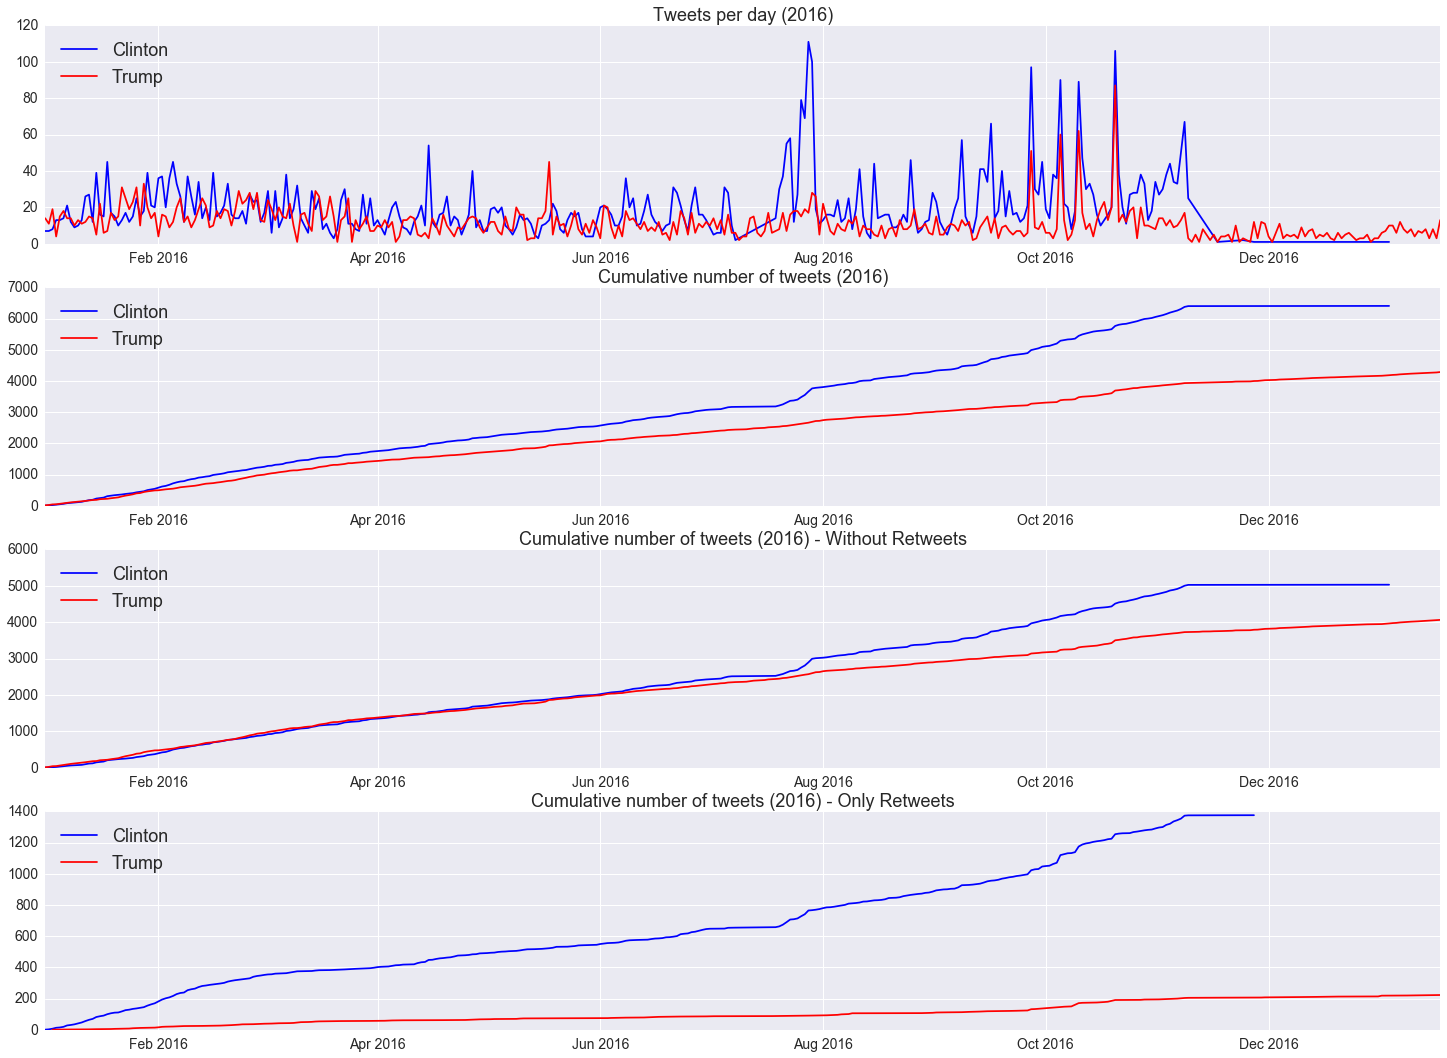

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(25,18))
plt.subplot(4, 1, 1)
pd.Series(hc_tweets_per_day).plot(title = 'Tweets per day (2016)', label = 'Clinton', color = 'b', fontsize = 14)
pd.Series(dt_tweets_per_day).plot(label = 'Trump', color = 'r')
plt.title('Tweets per day (2016)', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 18)

plt.subplot(4, 1, 2)
pd.Series(hc_tweets_per_day).cumsum().plot(title = 'Cumulative number of tweets (2016)', label = 'Clinton', color = 'b', fontsize = 14)
pd.Series(dt_tweets_per_day).cumsum().plot(label = 'Trump', color = 'r')
plt.title('Cumulative number of tweets (2016)', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 18)

plt.subplot(4, 1, 3)
pd.Series(hc_tweets_per_day_noRT).cumsum().plot(title = 'Cumulative number of tweets (2016) - Without Retweets', label = 'Clinton', color = 'b',
                                               fontsize = 14)
pd.Series(dt_tweets_per_day_noRT).cumsum().plot(label = 'Trump', color = 'r')
plt.title('Cumulative number of tweets (2016) - Without Retweets', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 18)

plt.subplot(4, 1, 4)
pd.Series(hc_tweets_per_day_only_RT).cumsum().plot(title = 'Cumulative number of tweets (2016) - Only Retweets', label = 'Clinton', color = 'b', 
                                                  fontsize = 14)
pd.Series(dt_tweets_per_day_only_RT).cumsum().plot(label = 'Trump', color = 'r')
plt.title('Cumulative number of tweets (2016) - Only Retweets', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 18)
plt.show()

In [7]:
sorted_tweets_hc = [(tweets, date) for date, tweets in hc_tweets_per_day.items()]
sorted_tweets_hc.sort(reverse=True)
sorted_tweets_dt = [(tweets, date) for date, tweets in dt_tweets_per_day.items()]
sorted_tweets_dt.sort(reverse=True)

In [8]:
print 'Date of max tweets (Clinton): ' + str(sorted_tweets_hc[0][1]) + ' -- number of tweets: ' + str(sorted_tweets_hc[0][0])
print 'Date of max tweets (Trump): ' + str(sorted_tweets_dt[0][1]) + ' -- number of tweets: ' + str(sorted_tweets_dt[0][0])

Date of max tweets (Clinton): 2016-07-28 -- number of tweets: 111
Date of max tweets (Trump): 2016-10-20 -- number of tweets: 87


In [9]:
pd.Series(hc_tweets_per_day).cumsum().values[-1]

6407

In [10]:
pd.Series(dt_tweets_per_day).cumsum().values[-1]

4287

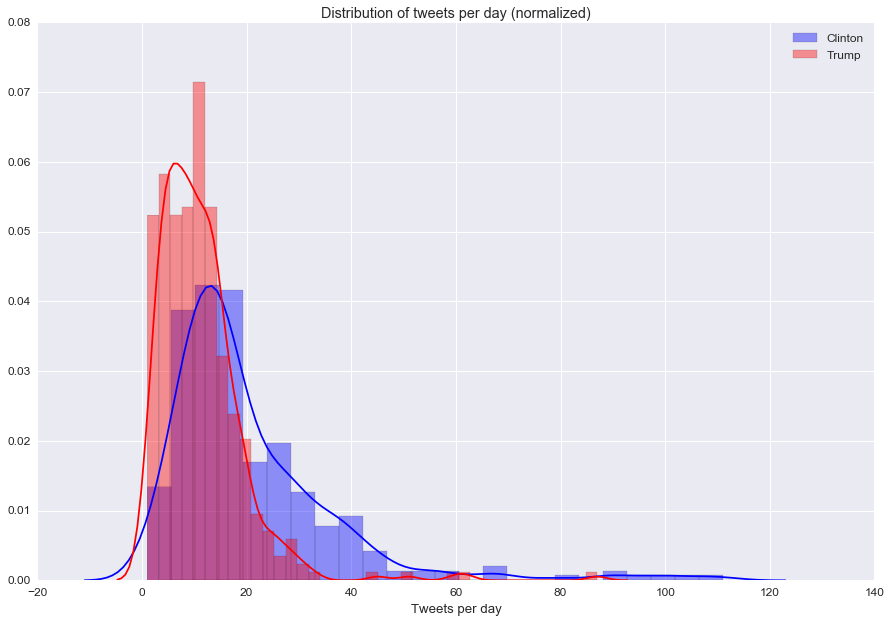

In [11]:
with sns.plotting_context("notebook", font_scale=1.2):
    fig, ax = plt.subplots(1,1, figsize = (15,10))
    sns.distplot(hc_tweets_per_day.values(), color='b', label='Clinton')
    sns.distplot(dt_tweets_per_day.values(), color='r', label='Trump')
    plt.xlabel('Tweets per day')
    plt.title("Distribution of tweets per day (normalized)")
    plt.legend()
plt.show()

Trump's tweets per day are less frequent, with a distribution heavily skewed towards the low end. 

In [12]:
import numpy as np
print np.mean(hc_tweets_per_day.values()), np.mean(dt_tweets_per_day.values())
print np.std(hc_tweets_per_day.values()), np.std(dt_tweets_per_day.values())

20.7346278317 11.2519685039
16.7010880294 8.6724911314


## 3. Hashtag frequency Trump/Clinton  (2016) - (Simple demo of NLTK usage.)

In [13]:
'''
class TOKENIZE():
    def getCLEAN(self, text):
        text = text.replace('\n',' ')
        text = text.replace('...',' TK.PUNCTUAION.ELLIPSES ')
        text = text.replace(u'\ufe0f', 'TK.SPECIALCHAR.UNSPECIFIED')
        text = text.replace(u'\u00a0','') #single quotation mark
        text = text.replace(u'\u2018',' TK.QUOTATION.SINGLE ')
        text = text.replace(u'\u2019',' TK.QUOTATION.SINGLE ')
        text = text.replace(u'\u201c',' TK.QUOTATION.DOUBLE ')
        text = text.replace(u'\u201d',' TK.QUOTATION.DOUBLE ')
        text = text.replace(u'\u2605',' TK.SPECIALCHAR.STAR ')
        text = text.replace(u'\u266a',' TK.SPECIALCHAR.NOTE ')
        return text

    def getLINK(self, text):
        return re.sub('(htt|www).?[^\s]+', ' TK.LINK ', text)

    def getMENTION(self, text):
        return re.sub('@.?[^\s]+', ' TK.MENTION ', text)
    
    Etc, etc...

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-13-e104f71c6d87>, line 22)

In [14]:
#Import modules. We'll use the tweeter tokenizer

import nltk
from nltk.tokenize import TweetTokenizer

In [15]:
#Extract tweets from 2016 - Create mask for dataframe

dt_mask_2016 = ((df_dt.created_at >= datetime.datetime.strptime('2016-01-01',"%Y-%m-%d")) & (df_dt.created_at < datetime.datetime.strptime('2017-01-01',"%Y-%m-%d")))
hc_mask_2016 = ((df_hc.created_at >= datetime.datetime.strptime('2016-01-01',"%Y-%m-%d")) & (df_hc.created_at < datetime.datetime.strptime('2017-01-01',"%Y-%m-%d")))

In [16]:
#Use tokenizer to extract hashtags:

tknzr = TweetTokenizer()
dt_hastags = Counter([y.lower() for x in df_dt[dt_mask_2016].text for y in tknzr.tokenize(x) if (y[0] =='#' and len(y)>1)]) 
hc_hastags = Counter([y.lower() for x in df_hc[hc_mask_2016].text for y in tknzr.tokenize(x) if (y[0] =='#' and len(y)>1)]) 

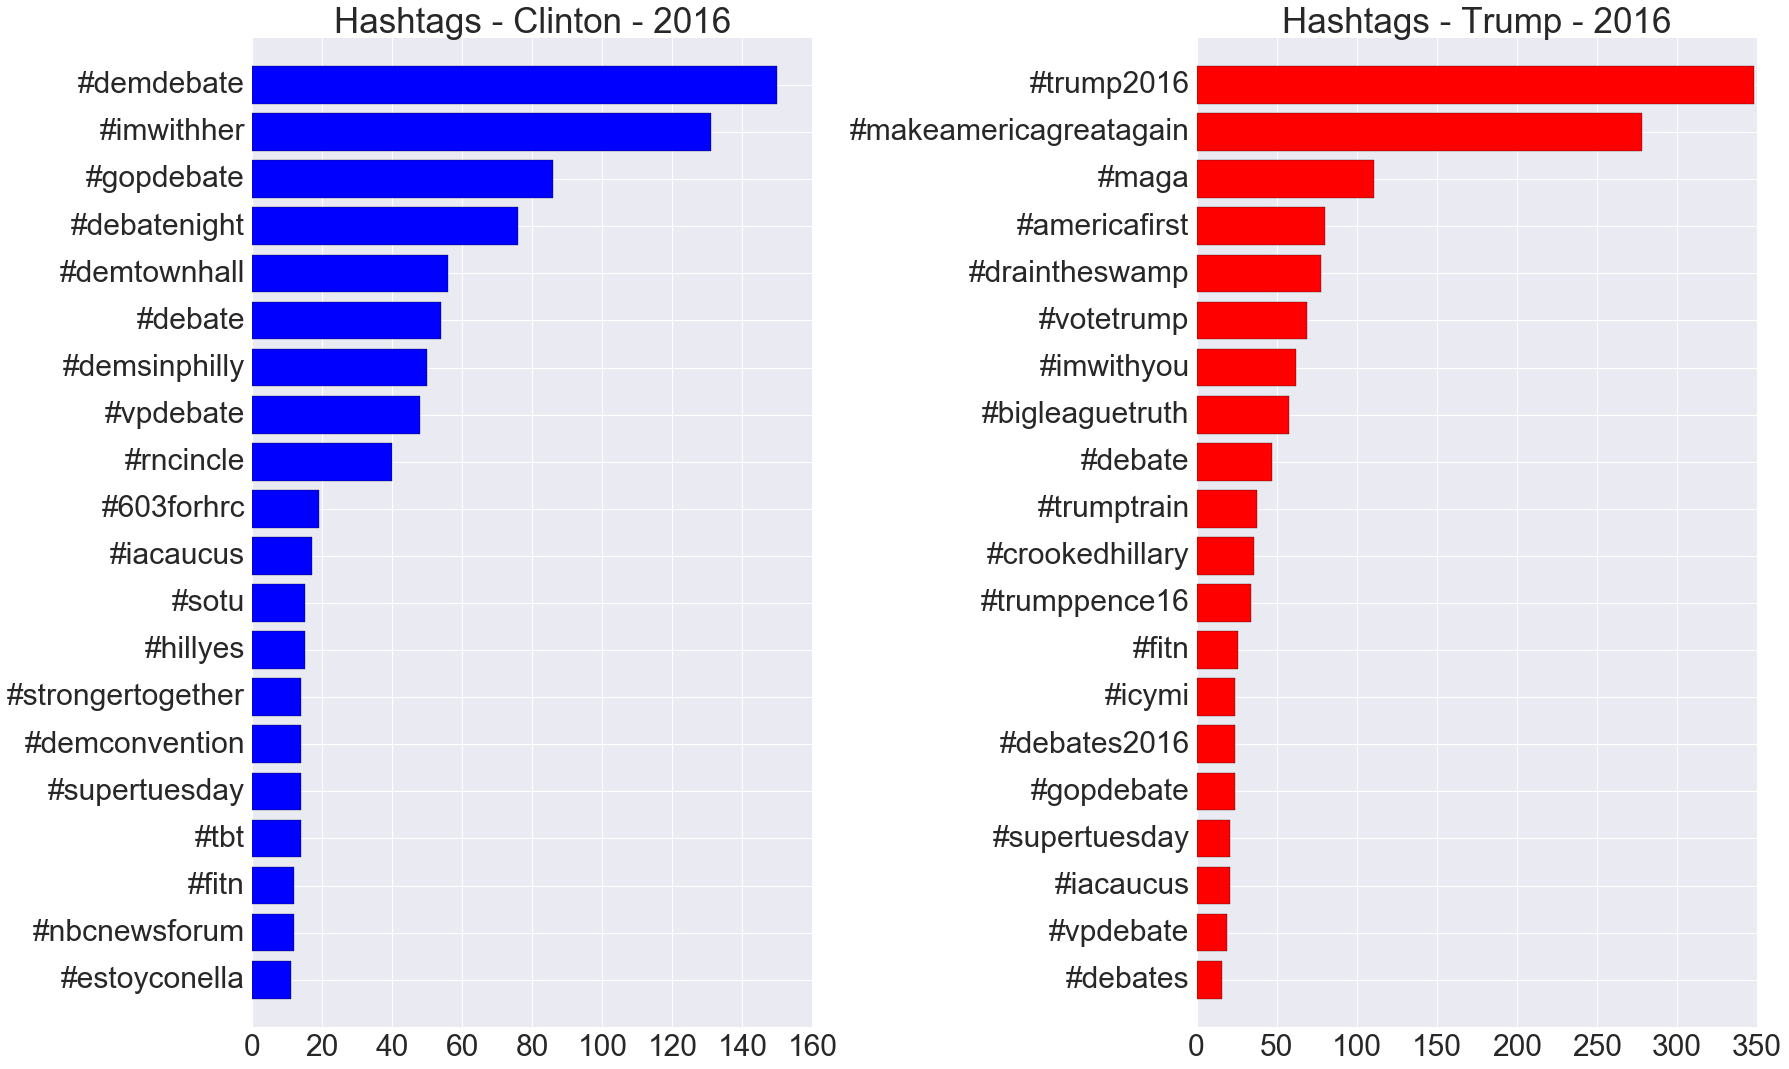

In [23]:
#Barplot of hashtags.

#plt.style.use('ggplot')
n_hast = 20
fig, axes = plt.subplots(1,2, figsize=(25,15))

axes[0].barh(range(n_hast), [x[1] for x in hc_hastags.most_common(n_hast)], align = 'center', color = 'b')
axes[0].set_yticks(range(n_hast))
axes[0].set_yticklabels([x[0] for x in hc_hastags.most_common(n_hast)], fontsize=25)
axes[0].set_title(r'Hashtags - Clinton - 2016', fontsize = 35)
axes[0].set_ylim(bottom=-1)
plt.tight_layout()
axes[0].grid(True)
axes[0].invert_yaxis()
axes[0].tick_params(labelsize=30)

axes[1].barh(range(n_hast), [x[1] for x in dt_hastags.most_common(n_hast)], align = 'center', color = 'r')
axes[1].set_yticks(range(n_hast))
axes[1].set_yticklabels([x[0] for x in dt_hastags.most_common(n_hast)], fontsize=25)
axes[1].set_title(r'Hashtags - Trump - 2016', fontsize = 35)
axes[1].set_ylim(bottom=-1)
axes[1].invert_yaxis()
axes[1].tick_params(labelsize=30)
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 4. Words used in tweets for either candidate - histogram

Again, use the tokenizer of the very good NLTK module:

In [25]:
#Use tokenizer to extract hashtags:

tknzr = TweetTokenizer()
dt_words = Counter([y.lower() for x in df_dt[dt_mask_2016].text for y in tknzr.tokenize(x) if (len(y)>1)]) 
hc_words = Counter([y.lower() for x in df_hc[hc_mask_2016].text for y in tknzr.tokenize(x) if (len(y)>1)]) 

In [26]:
dt_words.most_common(10) #Sample before filtering:

[(u'the', 2338),
 (u'to', 1505),
 (u'in', 1202),
 (u'and', 1200),
 (u'is', 1000),
 (u'you', 996),
 (u'of', 985),
 (u'will', 807),
 (u'for', 764),
 (u'on', 748)]

Not very good, lots of stop words and links, retweets, etc. This needs cleaning

In [27]:
#Import module for stopwords
from nltk.corpus import stopwords

In [28]:
def cleanupDoc(tweet, onlytext = True, stop_words = True):
    stopset = set(stopwords.words('english'))
    min_len = 2 
    if not stop_words:
        stopset = {}
        min_len = 0
    tokens = tknzr.tokenize(tweet) #use the twitter tokenizer
    cleanup = [token.lower() for token in tokens if token.lower() 
               not in stopset and token.lower() != '...' and len(token)>min_len]
    cleanup2 = []
    for x in cleanup:
        if 'http' in x:
            x = 'LINK'
        elif '@' in x:
            x = 'MENTION'
        elif '#' in x:
            x = 'HASHTAG'
        else:
            pass
        if onlytext:
            if x not in ['LINK', 'MENTION', 'HASHTAG']:
                cleanup2.append(x)
        else:
            cleanup2.append(x)
    return cleanup2

In [29]:
dt_tweets_2016 = [x for x in df_dt[dt_mask_2016].text]
temp = []
for tweet in dt_tweets_2016:
    temp.extend(cleanupDoc(tweet, onlytext=True))
dt_tweets_count_2016 = Counter(temp)

In [30]:
hc_tweets_2016 = [x for x in df_hc[hc_mask_2016].text]
temp = []
for tweet in hc_tweets_2016:
    temp.extend(cleanupDoc(tweet, onlytext=True))
hc_tweets_count_2016 = Counter(temp)

In [31]:
dt_tweets_count_2016.most_common(10)

[(u'thank', 641),
 (u'great', 578),
 (u'hillary', 460),
 (u'trump', 423),
 (u'clinton', 281),
 (u'people', 278),
 (u'america', 265),
 (u'new', 238),
 (u'crooked', 231),
 (u'make', 220)]

With this clean, tokenized version of the tweets, we get bar diagrams to check the most commonly used words by each:

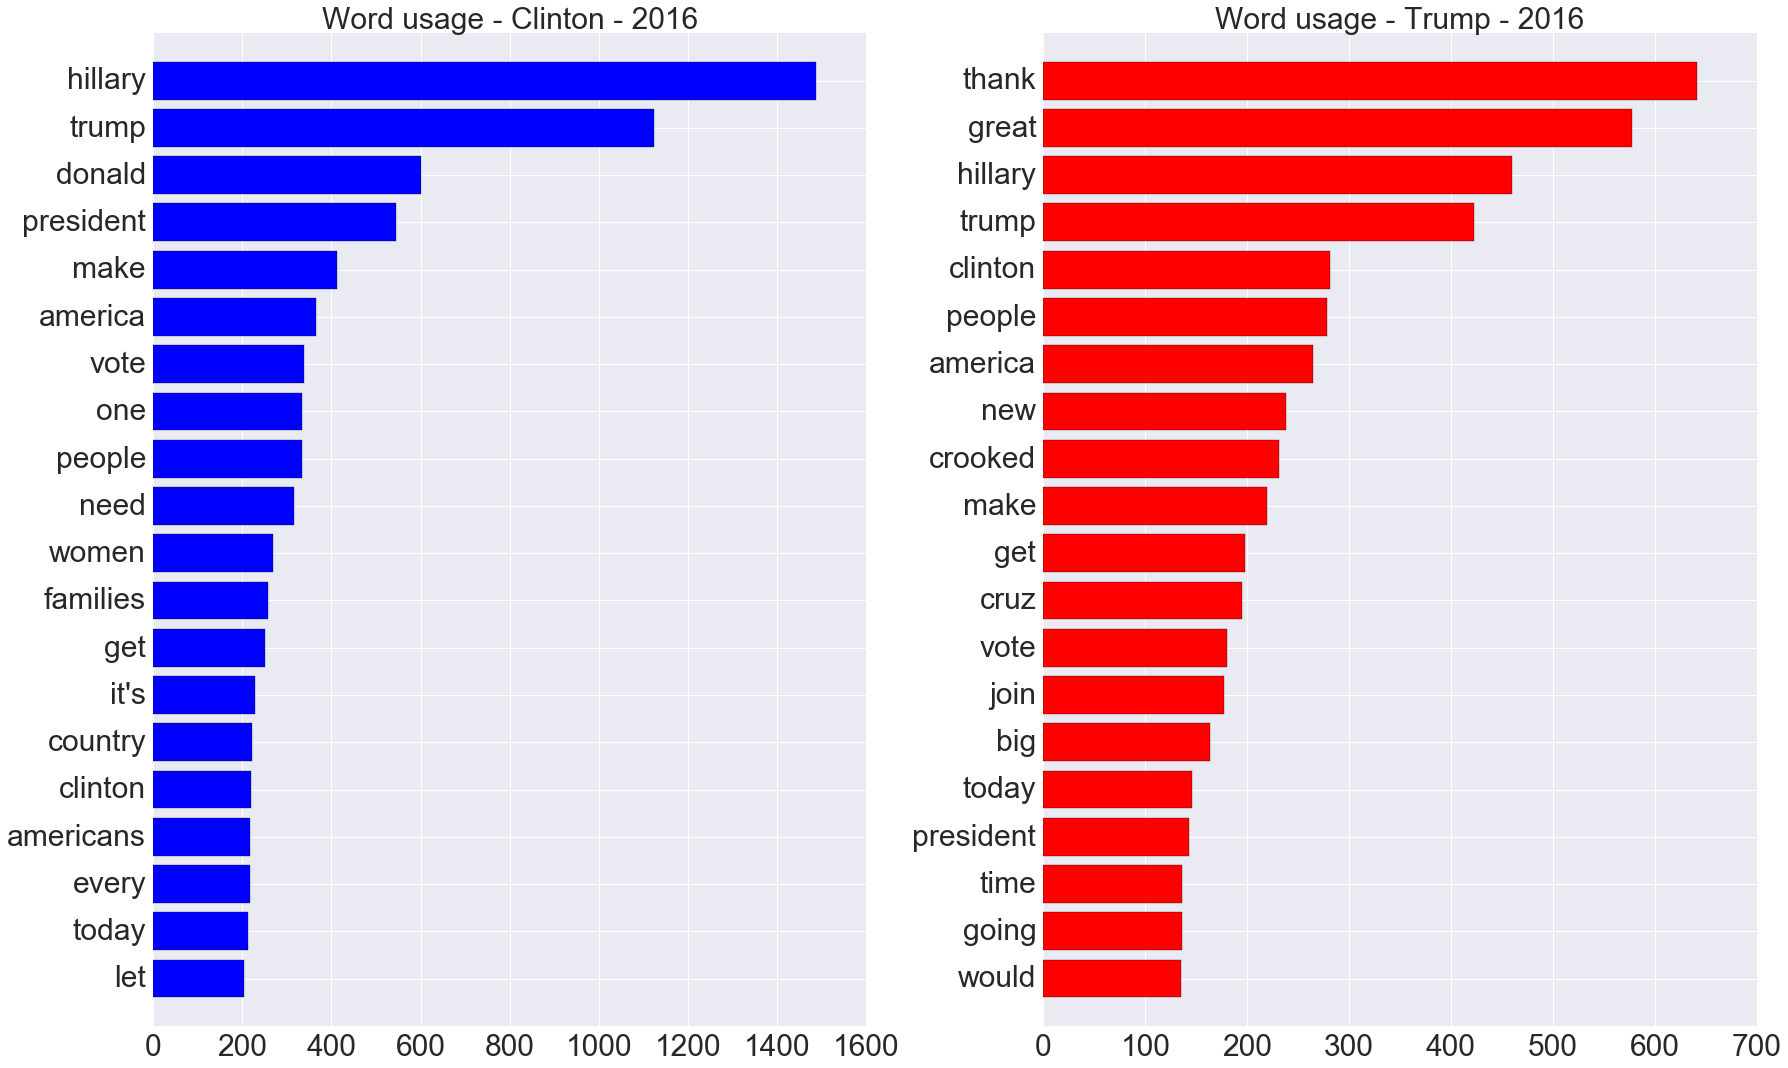

In [33]:
#Barplot of hashtags.
import seaborn as sns 
#plt.style.use('ggplot')
w_num = 20
fig, axes = plt.subplots(1,2, figsize=(25,15))

axes[0].barh(range(w_num), [x[1] for x in hc_tweets_count_2016.most_common(w_num)], align = 'center', color = 'b')
#axes[0].set_ylabel('Words', fontsize = 25)
axes[0].set_yticks(range(w_num))
axes[0].set_yticklabels([x[0] for x in hc_tweets_count_2016.most_common(w_num)], fontsize=25)
axes[0].set_title(r'Word usage - Clinton - 2016', fontsize = 30)
axes[0].set_ylim(bottom=-1)
plt.tight_layout()
axes[0].grid(True)
axes[0].invert_yaxis()
axes[0].tick_params(labelsize=30)

axes[1].barh(range(w_num), [x[1] for x in dt_tweets_count_2016.most_common(w_num)], align = 'center', color = 'r')
#axes[0].set_ylabel('Words', fontsize = 25)
axes[1].set_yticks(range(w_num))
axes[1].set_yticklabels([x[0] for x in dt_tweets_count_2016.most_common(w_num)], fontsize=25)
axes[1].set_title(r'Word usage - Trump - 2016', fontsize = 30)
axes[1].set_ylim(bottom=-1)
axes[1].invert_yaxis()
axes[1].tick_params(labelsize=30)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [101]:
#Testing a porter stemmer... 

from nltk.stem.porter import *
import nltk

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def lemma_tokens(tokens, lemmer):
    lemmatized = []
    for item in tokens:
        lemmatized.append(lemmer.lemmatize(item))
    return lemmatized

stemmer = PorterStemmer()
lemmer = nltk.wordnet.WordNetLemmatizer()

temp = []
for tweet in hc_tweets_2016:
    temp.extend(cleanupDoc(tweet, onlytext=True))
    
stemmed = stem_tokens(temp, stemmer)
stemmed_hc = Counter(stemmed)

temp = []
for tweet in dt_tweets_2016:
    temp.extend(cleanupDoc(tweet, onlytext=True))

stemmed = stem_tokens(temp, stemmer)
stemmed_dt = Counter(stemmed)

temp = []
for tweet in hc_tweets_2016:
    temp.extend(cleanupDoc(tweet, onlytext=True))
    
lemmed = lemma_tokens(temp, lemmer)
lemmed_hc = Counter(lemmed)

temp = []
for tweet in dt_tweets_2016:
    temp.extend(cleanupDoc(tweet, onlytext=True))

lemmed = lemma_tokens(temp, lemmer)
lemmed_dt = Counter(lemmed)

In [27]:
def cleanupDoc_stemmed(tweet, onlytext = True):
    stopset = set(stopwords.words('english'))
    tokens = tknzr.tokenize(tweet) #use the twitter tokenizer
    tokens = [x.split('\'')[0] for x in tokens] #get rid of '?
    cleanup = [token.lower() for token in tokens if token.lower() not in stopset and token.lower() != '...' and len(token)>2]
    cleanup2 = []
    for word in cleanup:
        x = []
        x.append(word)
        x = stem_tokens(x, stemmer)
        x = x[0]
        if 'http' in x:
            x = 'LINK'
        elif '@' in x:
            x = 'MENTION'
        elif '#' in x:
            x = 'HASHTAG'
        else:
            pass
        if onlytext:
            if x not in ['LINK', 'MENTION', 'HASHTAG']:
                cleanup2.append(x)
        else:
            cleanup2.append(x)
    return cleanup2

In [98]:
def cleanupDoc_lemmatized(tweet, onlytext = True):
    stopset = set(stopwords.words('english'))
    tokens = tknzr.tokenize(tweet) #use the twitter tokenizer
    tokens = [x.split('\'')[0] for x in tokens] #get rid of '?
    cleanup = [token.lower() for token in tokens if token.lower() not in stopset and token.lower() != '...' and len(token)>2]
    cleanup2 = []
    for word in cleanup:
        x = []
        x.append(word)
        x = lemma_tokens(x, lemmer)
        x = x[0]
        if 'http' in x:
            x = 'LINK'
        elif '@' in x:
            x = 'MENTION'
        elif '#' in x:
            x = 'HASHTAG'
        else:
            pass
        if onlytext:
            if x not in ['LINK', 'MENTION', 'HASHTAG']:
                cleanup2.append(x)
        else:
            cleanup2.append(x)
    return cleanup2

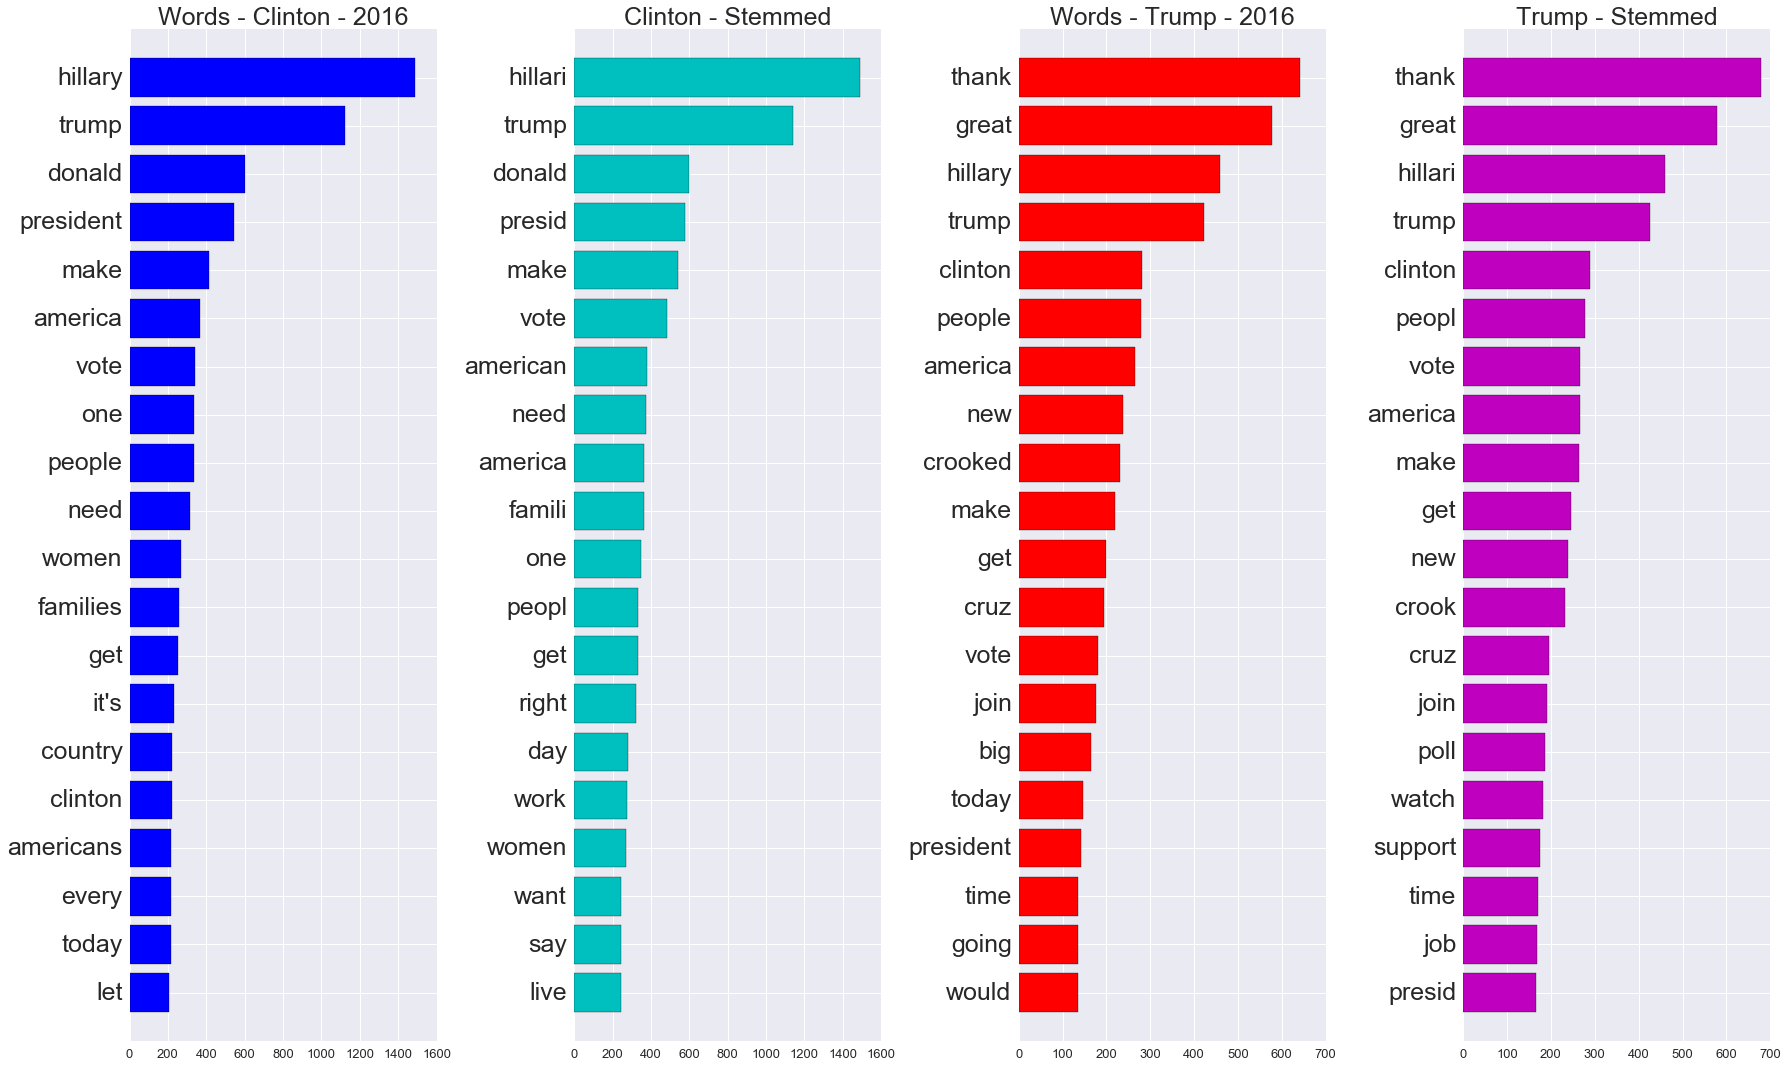

In [99]:
import seaborn as sns

w_num = 20
fig, axes = plt.subplots(1,4, figsize=(25,15))

axes[0].tick_params(labelsize=13)
axes[0].barh(range(w_num), [x[1] for x in hc_tweets_count_2016.most_common(w_num)], align = 'center', color = 'b')
#axes[0].set_ylabel('Words', fontsize = 25)
axes[0].set_yticks(range(w_num))
axes[0].set_yticklabels([x[0] for x in hc_tweets_count_2016.most_common(w_num)], fontsize=25)
axes[0].set_title(r'Words - Clinton - 2016', fontsize = 25)
axes[0].set_ylim(bottom=-1)
axes[0].grid(True)
axes[0].invert_yaxis()

axes[1].tick_params(labelsize=13)
axes[1].barh(range(w_num), [x[1] for x in stemmed_hc.most_common(w_num)], align = 'center', color = 'c')
#axes[0].set_ylabel('Words', fontsize = 25)
axes[1].set_yticks(range(w_num))
axes[1].set_yticklabels([x[0] for x in stemmed_hc.most_common(w_num)], fontsize=25)
axes[1].set_title(r'Clinton - Stemmed', fontsize = 25)
axes[1].set_ylim(bottom=-1)
axes[1].invert_yaxis()
axes[1].grid(True)

axes[2].tick_params(labelsize=13)
axes[2].barh(range(w_num), [x[1] for x in dt_tweets_count_2016.most_common(w_num)], align = 'center', color = 'r')
axes[2].set_yticks(range(w_num))
axes[2].set_yticklabels([x[0] for x in dt_tweets_count_2016.most_common(w_num)], fontsize=25)
axes[2].set_title(r'Words - Trump - 2016', fontsize = 25)
axes[2].set_ylim(bottom=-1)
axes[2].grid(True)
axes[2].invert_yaxis()

axes[3].tick_params(labelsize=13)
axes[3].barh(range(w_num), [x[1] for x in stemmed_dt.most_common(w_num)], align = 'center', color = 'm')
axes[3].set_yticks(range(w_num))
axes[3].set_yticklabels([x[0] for x in stemmed_dt.most_common(w_num)], fontsize=25)
axes[3].set_title(r'Trump - Stemmed', fontsize = 25)
axes[3].set_ylim(bottom=-1)
axes[3].invert_yaxis()
axes[3].grid(True)


plt.tight_layout()
plt.show()

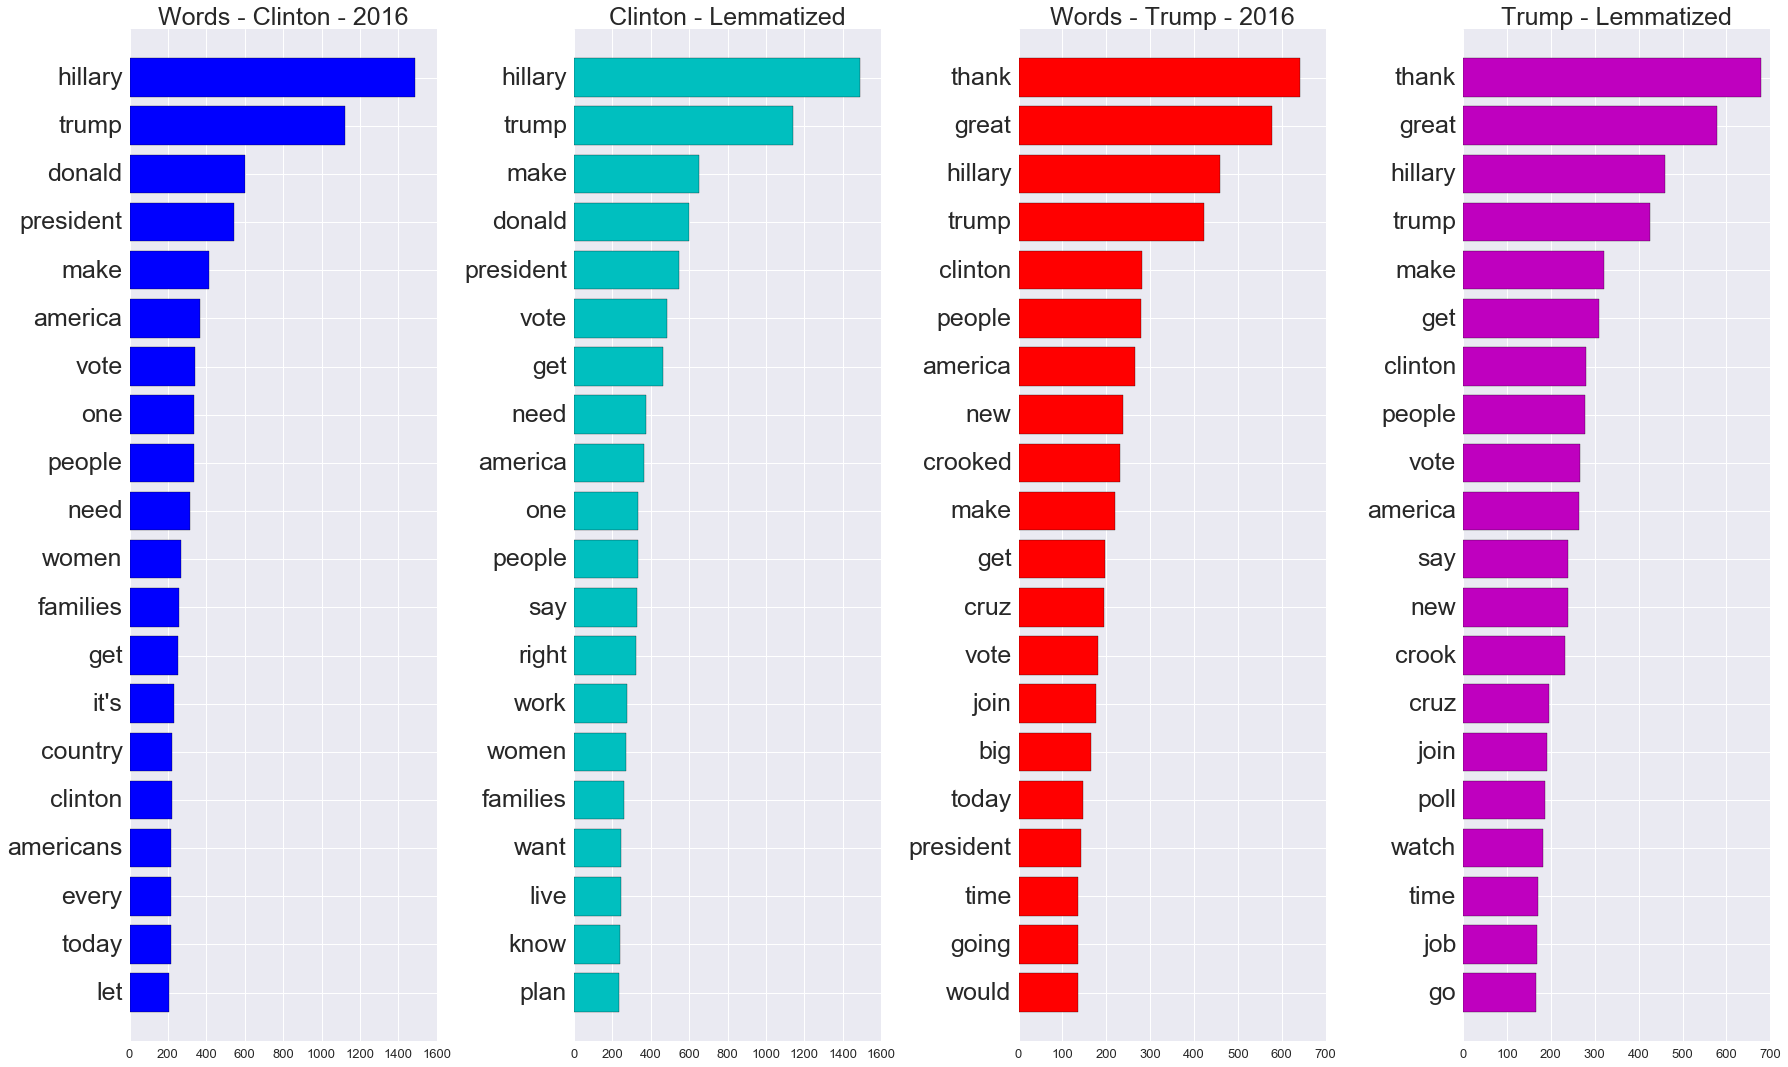

In [100]:
import seaborn as sns

w_num = 20
fig, axes = plt.subplots(1,4, figsize=(25,15))

axes[0].tick_params(labelsize=13)
axes[0].barh(range(w_num), [x[1] for x in hc_tweets_count_2016.most_common(w_num)], align = 'center', color = 'b')
#axes[0].set_ylabel('Words', fontsize = 25)
axes[0].set_yticks(range(w_num))
axes[0].set_yticklabels([x[0] for x in hc_tweets_count_2016.most_common(w_num)], fontsize=25)
axes[0].set_title(r'Words - Clinton - 2016', fontsize = 25)
axes[0].set_ylim(bottom=-1)
axes[0].grid(True)
axes[0].invert_yaxis()

axes[1].tick_params(labelsize=13)
axes[1].barh(range(w_num), [x[1] for x in lemmed_hc.most_common(w_num)], align = 'center', color = 'c')
#axes[0].set_ylabel('Words', fontsize = 25)
axes[1].set_yticks(range(w_num))
axes[1].set_yticklabels([x[0] for x in lemmed_hc.most_common(w_num)], fontsize=25)
axes[1].set_title(r'Clinton - Lemmatized', fontsize = 25)
axes[1].set_ylim(bottom=-1)
axes[1].invert_yaxis()
axes[1].grid(True)

axes[2].tick_params(labelsize=13)
axes[2].barh(range(w_num), [x[1] for x in dt_tweets_count_2016.most_common(w_num)], align = 'center', color = 'r')
axes[2].set_yticks(range(w_num))
axes[2].set_yticklabels([x[0] for x in dt_tweets_count_2016.most_common(w_num)], fontsize=25)
axes[2].set_title(r'Words - Trump - 2016', fontsize = 25)
axes[2].set_ylim(bottom=-1)
axes[2].grid(True)
axes[2].invert_yaxis()

axes[3].tick_params(labelsize=13)
axes[3].barh(range(w_num), [x[1] for x in lemmed_dt.most_common(w_num)], align = 'center', color = 'm')
axes[3].set_yticks(range(w_num))
axes[3].set_yticklabels([x[0] for x in lemmed_dt.most_common(w_num)], fontsize=25)
axes[3].set_title(r'Trump - Lemmatized', fontsize = 25)
axes[3].set_ylim(bottom=-1)
axes[3].invert_yaxis()
axes[3].grid(True)


plt.tight_layout()
plt.show()

##  5. Predictive model. If we use a machine learning model, how certain are we of the author of the tweet? - stemmed version

In [31]:
#Import machine learning models
import numpy as np

from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import SGDClassifier

/Users/carlosjarguello/anaconda/envs/insight_project/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
#How many unique words per candidate?
print 'Clinton unique words: ' + str(len(hc_tweets_count_2016.keys()))
print 'Trump unique words: ' + str(len(dt_tweets_count_2016.keys()))

Clinton unique words: 7494
Trump unique words: 5903


In [33]:
#How many tweets do we have per person?
print 'clinton tweets= ' + str(len(hc_tweets_2016)) + ' trump tweets= ' + str(len(dt_tweets_2016))

clinton tweets= 6406 trump tweets= 4162


In [34]:
X = hc_tweets_2016+dt_tweets_2016;
y = [0 for _ in range(len(hc_tweets_2016))] + [1 for _ in range(len(dt_tweets_2016))]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [36]:
#Vectorizer for going from words -> numbers
vectorizer = TfidfVectorizer(tokenizer=cleanupDoc_lemmatized, min_df=15,
                                 max_df = 0.8,
                                 sublinear_tf=False,
                                 use_idf=True)

In [37]:
X_train = vectorizer.fit_transform(X_train);

In [38]:
#Healthy ratio of features/data? Let's check:
X_train.shape

(8454, 874)

In [39]:
#Choose Logistic Regression as classifier
clf_LR = LogisticRegression(class_weight='balanced')

In [40]:
#Choose SVM/linear kernel as classifier
clf_linear = svm.SVC(kernel='linear', class_weight='balanced')

In [41]:
clf_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [42]:
clf_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
X_test = vectorizer.transform(X_test)

In [44]:
pr_LR_test = clf_LR.predict(X_test)

In [45]:
pr_linear_val = clf_linear.predict(X_test)

In [46]:
#Evaluate predictive power in test set
print classification_report(y_test, pr_LR_test, target_names= ['Clinton', 'Trump'])

             precision    recall  f1-score   support

    Clinton       0.86      0.87      0.87      1273
      Trump       0.80      0.79      0.79       841

avg / total       0.84      0.84      0.84      2114



In [47]:
#Evaluate predictive power in validating set
print classification_report(y_test, pr_linear_val, target_names= ['Clinton', 'Trump'])

             precision    recall  f1-score   support

    Clinton       0.86      0.87      0.87      1273
      Trump       0.80      0.79      0.80       841

avg / total       0.84      0.84      0.84      2114



ROC curve

In [48]:
from sklearn.metrics import roc_curve, auc

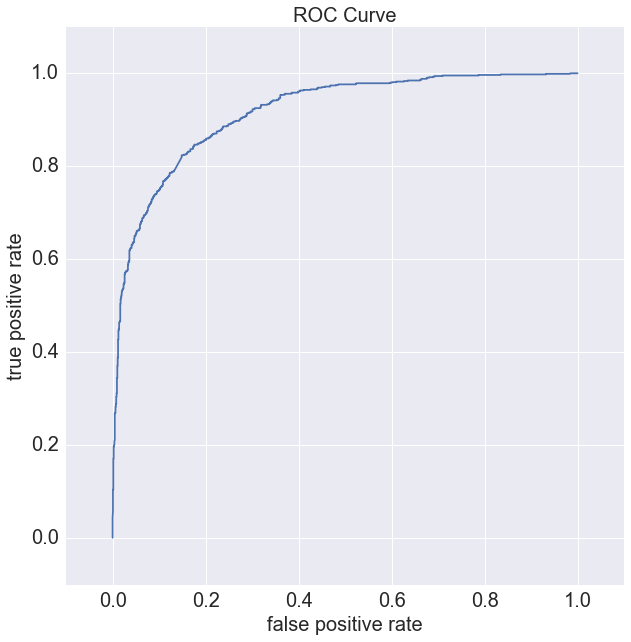

AUC = 0.916888584177


In [49]:
# roc curve
fpr, tpr, threshold = roc_curve(y_test, clf_LR.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

fix, ax = plt.subplots(1,1, figsize=(10,10))
plt.plot(fpr, tpr)
plt.title("ROC Curve", fontsize=20)
plt.xlabel("false positive rate", fontsize=20)
plt.ylabel("true positive rate", fontsize=20)
plt.xlim( (-0.1, 1.1) )
plt.ylim( (-0.1, 1.1) )
plt.tick_params(labelsize=20)
plt.show()

print 'AUC = ' + str(roc_auc)

In [50]:
sorted(zip(tpr-fpr,threshold))[-1]

(0.67476529362698989, 0.49285224867006078)

In [51]:
from sklearn.metrics import confusion_matrix
import itertools

In [52]:
cnf_matrix = confusion_matrix(y_test, pr_LR_test, labels=[0, 1])

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=20)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 20)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.tick_params(labelsize=20)

Normalized confusion matrix
[[ 0.86959937  0.13040063]
 [ 0.21165279  0.78834721]]


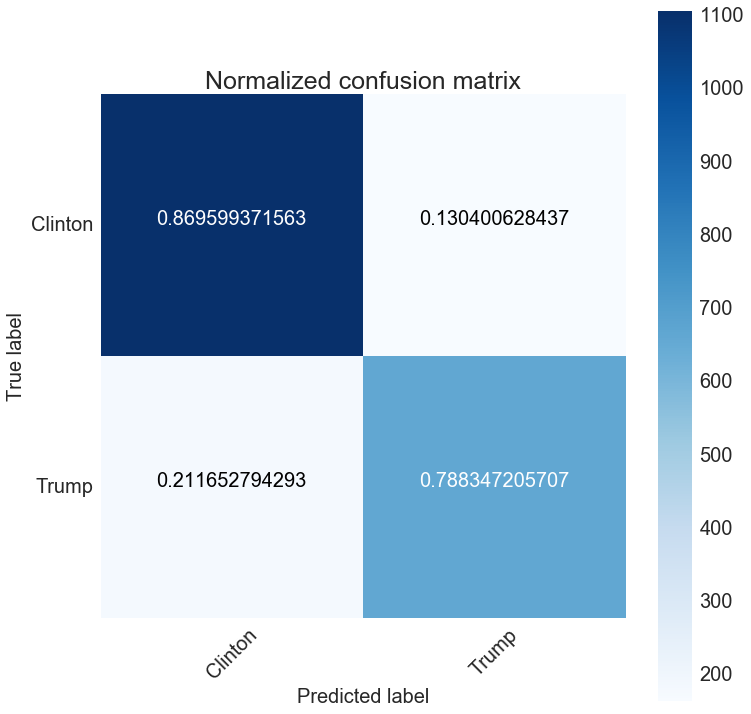

In [54]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
plot_confusion_matrix(cnf_matrix, classes=['Clinton', 'Trump'], normalize=True,
                      title='Normalized confusion matrix')
plt.grid(False)
plt.tick_params(labelsize=20)
plt.show()

In [55]:
vectorizer_cv = TfidfVectorizer(tokenizer=cleanupDoc_lemmatized, min_df=17,
                                 max_df = 0.8,
                                 sublinear_tf=False,
                                 use_idf=True)

In [56]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True) 
scores_cv_f1 = cross_val_score(clf_LR, vectorizer_cv.fit_transform(X), y, cv=cv, scoring='f1_macro', n_jobs=-1)

In [58]:
print 'f-1 scores ' + str(scores_cv_f1) 
print 'f-1 score = %.3f +/- %.4f'  %(scores_cv_f1.mean(), scores_cv_f1.std())

f-1 scores [ 0.84609565  0.83518711  0.84832855  0.8437741   0.81964188]
f-1 score = 0.839 +/- 0.0105


In [59]:
#Tuning hyperparameters
Cs = np.logspace(-1, 1, 15)

In [60]:
Cs

array([  0.1       ,   0.13894955,   0.19306977,   0.26826958,
         0.37275937,   0.51794747,   0.71968567,   1.        ,
         1.38949549,   1.93069773,   2.6826958 ,   3.72759372,
         5.17947468,   7.19685673,  10.        ])

In [61]:
clf_LR_Hyp = GridSearchCV(estimator=clf_LR, param_grid=dict(C=Cs), cv = cv, scoring = 'f1_macro', n_jobs=-1)

In [62]:
clf_LR_Hyp.fit(vectorizer_cv.transform(X),y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  0.1    ,   0.13895,   0.19307,   0.26827,   0.37276,   0.51795,
         0.71969,   1.     ,   1.3895 ,   1.9307 ,   2.6827 ,   3.72759,
         5.17947,   7.19686,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_macro', verbose=0)

In [63]:
print clf_LR_Hyp.best_params_, clf_LR_Hyp.best_score_

{'C': 2.6826957952797246} 0.840379022413


### Now the fun part... We saw Clinton's/Trump's hashtags/words. The model is (reasonably) successful in predicting tweets authored by each candidate. What are the most relevant features to define a given class? (i.e., what does a tweet have to say to be more "Clintoney" or "Trumpey"?

In [64]:
#Function to extract most important features from classifier (by coeficient value)
def show_most_informative_features(vectorizer, clf, n=20, printing=False):
    feature_names = vectorizer.get_feature_names()
    try:
        coefs_list = np.array(clf.coef_.todense()).flatten()
    except:
        coefs_list = np.array(clf.coef_.flatten())
    coefs_with_fns = sorted(zip(coefs_list, feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    out1 =[]
    out2 =[]
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        if printing:
            print "\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2)
        else:
            out1.append((fn_1, abs(coef_1)))
            out2.append((fn_2, abs(coef_2)))
    if not printing:
        return sorted(out1, key=lambda x:x[1], reverse=True), sorted(out2, key=lambda x:x[1], reverse=True)

### And... Clinton vs Trump speech (as classified by the model), using all tweets:

In [73]:
clf_LR = LogisticRegression(C=2.68, class_weight='balanced')
clf_LR.fit(vectorizer.fit_transform(X), y)

LogisticRegression(C=2.68, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [74]:
show_most_informative_features(vectorizer, clf_LR, 40, printing=True)

	-6.7313	hillary        		10.6098	crooked        
	-4.2978	flint          		5.6754	great          
	-4.2322	climate        		5.2298	cruz           
	-3.7589	student        		5.0852	medium         
	-3.6677	matter         		4.4875	border         
	-3.5140	equality       		4.3103	jeb            
	-3.4380	progress       		4.2889	donaldtrump    
	-3.4193	kid            		4.1418	clinton        
	-3.3887	fear           		4.0085	thank          
	-3.2804	chip           		3.9262	cnn            
	-3.2512	commander-in-chief		3.8426	enjoy          
	-3.2457	michelle       		3.8066	dishonest      
	-3.2262	trail          		3.7583	rubio          
	-3.2033	donald         		3.7571	corrupt        
	-3.1538	progressive    		3.6793	bad            
	-3.1305	heart          		3.6199	failed         
	-3.1033	lgbt           		3.5222	email          
	-3.0620	confirm        		3.4633	radical        
	-3.0615	mom            		3.3940	nice           
	-3.0604	tim            		3.2005	dems           
	-3.0495	dangero

In [67]:
coefs1, coefs2 = show_most_informative_features(vectorizer, clf_LR, 40)

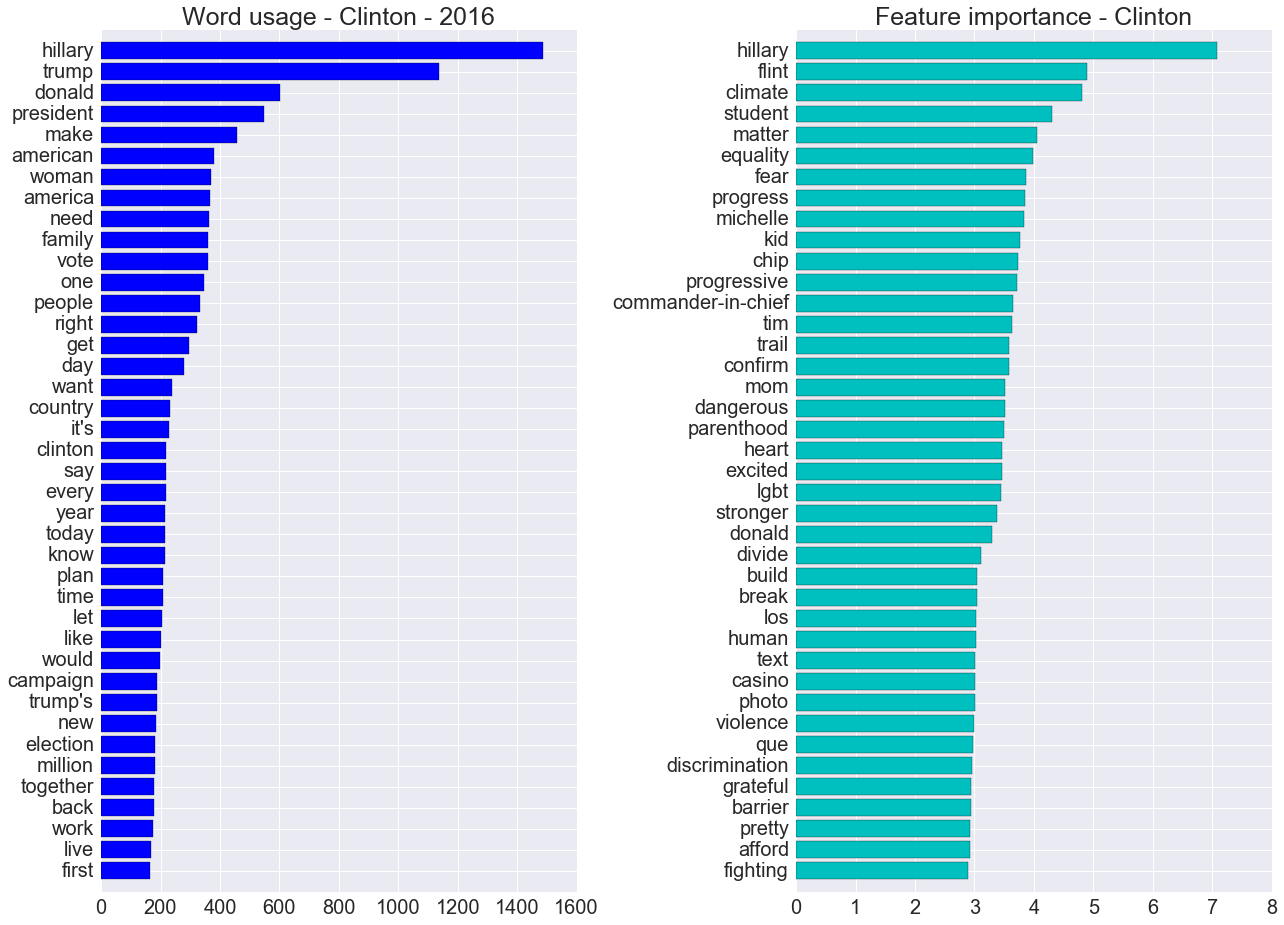

In [68]:
#Barplot of hashtags.
import seaborn as sns 
#plt.style.use('ggplot')
w_num = 40
fig, axes = plt.subplots(1,2, figsize=(18,13))

axes[0].barh(range(w_num), [x[1] for x in lemmed_hc.most_common(w_num)], align = 'center', color = 'b')
#axes[0].set_ylabel('Words', fontsize = 25)
axes[0].set_yticks(range(w_num))
axes[0].set_yticklabels([x[0] for x in lemmed_hc.most_common(w_num)], fontsize=20)
axes[0].set_title(r'Word usage - Clinton - 2016', fontsize = 25)
axes[0].set_ylim(bottom=-1)
plt.tight_layout()
axes[0].grid(True)
axes[0].invert_yaxis()
axes[0].tick_params(labelsize=20)

axes[1].barh(range(w_num), [x[1] for x in coefs1], align = 'center', color = 'c')
#axes[0].set_ylabel('Words', fontsize = 25)
axes[1].set_yticks(range(w_num))
axes[1].set_yticklabels([x[0] for x in coefs1], fontsize=20)
axes[1].set_title(r'Feature importance - Clinton', fontsize = 25)
axes[1].set_ylim(bottom=-1)
axes[1].invert_yaxis()
axes[1].tick_params(labelsize=20)
axes[1].grid(True)

plt.tight_layout()
plt.show()

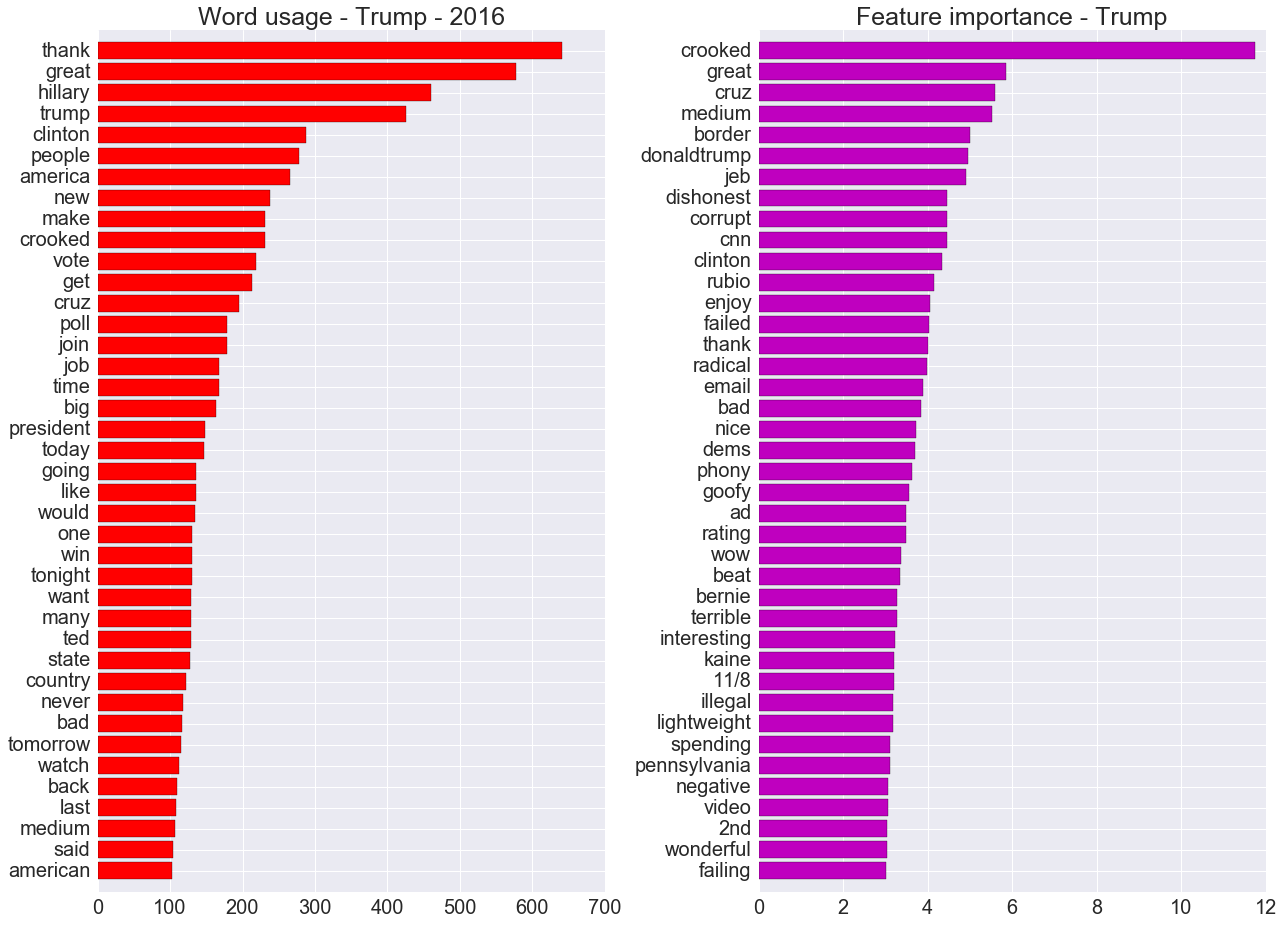

In [69]:
#Barplot of hashtags.
import seaborn as sns 
#plt.style.use('ggplot')
w_num = 40
fig, axes = plt.subplots(1,2, figsize=(18,13))

axes[0].barh(range(w_num), [x[1] for x in lemmed_dt.most_common(w_num)], align = 'center', color = 'r')
#axes[0].set_ylabel('Words', fontsize = 25)
axes[0].set_yticks(range(w_num))
axes[0].set_yticklabels([x[0] for x in lemmed_dt.most_common(w_num)], fontsize=20)
axes[0].set_title(r'Word usage - Trump - 2016', fontsize = 25)
axes[0].set_ylim(bottom=-1)
plt.tight_layout()
axes[0].grid(True)
axes[0].invert_yaxis()
axes[0].tick_params(labelsize=20)

axes[1].barh(range(w_num), [x[1] for x in coefs2], align = 'center', color = 'm')
#axes[0].set_ylabel('Words', fontsize = 25)
axes[1].set_yticks(range(w_num))
axes[1].set_yticklabels([x[0] for x in coefs2], fontsize=20)
axes[1].set_title(r'Feature importance - Trump', fontsize = 25)
axes[1].set_ylim(bottom=-1)
axes[1].invert_yaxis()
axes[1].tick_params(labelsize=20)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [78]:
lemmer.lemmatize('playing')

'playing'

In [303]:
clf_linear.fit(vectorizer.fit_transform(X), y)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [304]:
show_most_informative_features(vectorizer, clf_linear, 40, printing=True)

	-4.1174	hillary        		6.1149	crooked        
	-2.6327	flint          		3.5952	great          
	-2.5279	climate        		3.4659	medium         
	-2.4672	michelle       		3.2627	cruz           
	-2.3141	commander-in-chief		3.0677	donaldtrump    
	-2.2509	progressive    		2.8673	border         
	-2.2055	heart          		2.7270	dishonest      
	-2.1095	matter         		2.7072	corrupt        
	-2.1068	equality       		2.6890	cnn            
	-2.0766	confirm        		2.6154	jeb            
	-2.0760	lgbt           		2.4785	clinton        
	-1.9897	fear           		2.4155	rubio          
	-1.9770	donald         		2.3412	thank          
	-1.9745	excited        		2.3379	2nd            
	-1.9447	discrimination 		2.3359	email          
	-1.9188	kid            		2.3317	radical        
	-1.8993	parenthood     		2.3068	rating         
	-1.8858	trail          		2.2790	usa            
	-1.8462	thing          		2.2782	bad            
	-1.8058	student        		2.1701	dems           
	-1.7963	presiden

## ------------------

## 6. Using Latent Dirichlet Allocation: Can we find 3 different topics by politician?

In [335]:
import gensim
from gensim import corpora, models

To generate an LDA model, we need to understand how frequently each term occurs within each document. To do that, we need to construct a document-term matrix with a package called gensim:

In [372]:
hc_tweets_2016[0]

u'We have a responsibility to fight for the next generation. All of us. #TBT\nhttps://t.co/p4FcuCcVmW'

In [373]:
tweets_hc = [cleanupDoc_lemmatized(x, onlytext=True) for x in hc_tweets_2016]
tweets_dt = [cleanupDoc_lemmatized(x, onlytext=True) for x in dt_tweets_2016]

In [374]:
dictionary_hc = corpora.Dictionary(tweets_hc)
dictionary_dt = corpora.Dictionary(tweets_dt)

The Dictionary() function traverses texts, assigning a unique integer id to each unique token while also collecting word counts and relevant statistics. To see each token’s unique integer id, try print(dictionary.token2id).

In [375]:
#convert to bag-of-words:
corpus_hc = [dictionary_hc.doc2bow(text) for text in tweets_hc]
corpus_dt = [dictionary_dt.doc2bow(text) for text in tweets_dt]

This list of tuples represents our first document, doc_a. The tuples are (term ID, term frequency) pairs, so if print(dictionary.token2id) says brocolli’s id is 0, then the first tuple indicates that brocolli appeared twice in doc_a. doc2bow() only includes terms that actually occur: terms that do not occur in a document will not appear in that document’s vector.

In [376]:
#Fitting model
ldamodel_hc = gensim.models.ldamodel.LdaModel(corpus_hc, num_topics=3, id2word = dictionary_hc, passes=30)
ldamodel_dt = gensim.models.ldamodel.LdaModel(corpus_dt, num_topics=3, id2word = dictionary_dt, passes=30)

Once the model is fitted, let's see if we can distinguish some topics:

In [378]:
print(ldamodel_hc.print_topics(num_topics=3, num_words=20)[0][1])
print(ldamodel_hc.print_topics(num_topics=3, num_words=20)[1][1])
print(ldamodel_hc.print_topics(num_topics=3, num_words=20)[2][1])

0.044*"hillary" + 0.018*"make" + 0.012*"need" + 0.011*"vote" + 0.009*"let" + 0.009*"america" + 0.009*"one" + 0.009*"get" + 0.008*"day" + 0.008*"president" + 0.007*"people" + 0.007*"together" + 0.007*"country" + 0.006*"election" + 0.006*"last" + 0.006*"work" + 0.006*"know" + 0.006*"live" + 0.006*"every" + 0.006*"watch"
0.026*"woman" + 0.017*"hillary" + 0.016*"trump" + 0.016*"right" + 0.015*"president" + 0.012*"first" + 0.008*"clinton" + 0.007*"care" + 0.007*"health" + 0.006*"white" + 0.006*"time" + 0.005*"state" + 0.005*"child" + 0.005*"house" + 0.005*"word" + 0.005*"republican" + 0.004*"policy" + 0.004*"day" + 0.004*"united" + 0.004*"family"
0.060*"trump" + 0.032*"donald" + 0.013*"hillary" + 0.011*"like" + 0.010*"would" + 0.009*"people" + 0.008*"president" + 0.008*"american" + 0.008*"america" + 0.007*"thing" + 0.007*"say" + 0.007*"tax" + 0.007*"one" + 0.006*"gun" + 0.005*"plan" + 0.005*"penny" + 0.005*"family" + 0.005*"million" + 0.005*"said" + 0.004*"running"


In [377]:
print(ldamodel_dt.print_topics(num_topics=3, num_words=20)[0][1])
print(ldamodel_dt.print_topics(num_topics=3, num_words=20)[1][1])
print(ldamodel_dt.print_topics(num_topics=3, num_words=20)[2][1])

0.019*"hillary" + 0.012*"clinton" + 0.010*"people" + 0.010*"crooked" + 0.008*"rubio" + 0.007*"trump" + 0.007*"kasich" + 0.007*"medium" + 0.007*"ohio" + 0.006*"would" + 0.006*"candidate" + 0.006*"dishonest" + 0.006*"want" + 0.006*"bad" + 0.006*"say" + 0.006*"marco" + 0.006*"wow" + 0.006*"million" + 0.005*"run" + 0.005*"cruz"
0.066*"thank" + 0.020*"great" + 0.015*"new" + 0.014*"trump" + 0.012*"vote" + 0.012*"big" + 0.012*"join" + 0.011*"tomorrow" + 0.010*"ohio" + 0.009*"today" + 0.009*"kansa" + 0.009*"crowd" + 0.008*"florida" + 0.008*"tonight" + 0.008*"michigan" + 0.008*"carolina" + 0.007*"rally" + 0.007*"amazing" + 0.006*"enjoy" + 0.006*"soon"
0.025*"america" + 0.023*"great" + 0.019*"make" + 0.014*"trump" + 0.011*"win" + 0.011*"job" + 0.010*"back" + 0.010*"people" + 0.009*"get" + 0.007*"country" + 0.006*"know" + 0.006*"ted" + 0.005*"cruz" + 0.005*"right" + 0.005*"bring" + 0.005*"like" + 0.005*"going" + 0.005*"interview" + 0.004*"lost" + 0.004*"president"


"This explanation is a little lengthy, but useful for understanding the model we worked so hard to generate.

LDA assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution, like the ones in our walkthrough model. In other words, LDA assumes a document is made from the following steps:

Determine the number of words in a document. Let’s say our document has 6 words.
Determine the mixture of topics in that document. For example, the document might contain 1/2 the topic “health” and 1/2 the topic “vegetables.”
Using each topic’s multinomial distribution, output words to fill the document’s word slots. In our example, the “health” topic is 1/2 our document, or 3 words. The “health” topic might have the word “diet” at 20% probability or “exercise” at 15%, so it will fill the document word slots based on those probabilities.
Given this assumption of how documents are created, LDA backtracks and tries to figure out what topics would create those documents in the first place."

In [312]:
dt_topicdist = {"Candidate" : "Trump", "Topic 1" : 0, "Topic 2" : 0, "Topic 3" : 0}
hc_topicdist = {"Candidate" : "Clinton", "Topic 1" : 0, "Topic 2" : 0, "Topic 3" : 0}

In [313]:
for x in corpus_dt:
    dt_topicdist['Topic ' + str(sorted(ldamodel_dt[x], key = lambda x: x[1])[-1][0]+1)] += 1/len(corpus_dt)

In [314]:
for x in corpus_hc:
    hc_topicdist['Topic ' + str(sorted(ldamodel_hc[x], key = lambda x: x[1])[-1][0]+1)] += 1/len(corpus_hc)

In [315]:
df_topics = pd.DataFrame.from_dict([hc_topicdist,dt_topicdist])

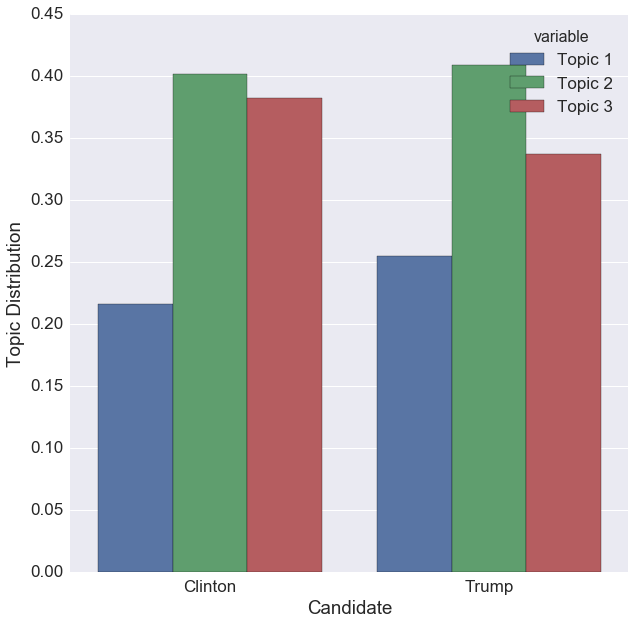

In [316]:
with sns.plotting_context("notebook", font_scale=1.7):
    fig, ax = plt.subplots(1,1, figsize = (10,10))
    sns.barplot(x='Candidate', y='value', hue='variable', data = pd.melt(df_topics, id_vars=['Candidate'], value_vars=['Topic 1', 'Topic 2', 'Topic 3']))
    ax.set_ylabel('Topic Distribution')
plt.show()

## Word2Vec - Merely an academic exercise with the tweets. Find word similarity based on tweet context

In [379]:
#Import word2vec model from gensim, define parameters
from gensim.models import Word2Vec
min_count = 20    #Minimum frequency of words 
size = 50   #Dimensionality of vector space
window = 6  #Maximum separation of words
sg = 1 #0 = CBOW, 1 = Skip-gram 

In [381]:
model_hc = Word2Vec([cleanupDoc_lemmatized(x) for x in hc_tweets_2016], min_count=min_count, size=size, window=window,sg=sg, iter=10)
model_dt = Word2Vec([cleanupDoc_lemmatized(x) for x in dt_tweets_2016], min_count=min_count, size=size, window=window, sg=sg, iter=10)

In [382]:
model_dt.most_similar(positive=['hillary','clinton'])

[(u'crooked', 0.9919230937957764),
 (u'e-mail', 0.9904091358184814),
 (u'judgement', 0.9896026849746704),
 (u'bad', 0.9880074262619019),
 (u'email', 0.9855966567993164),
 (u'system', 0.9813316464424133),
 (u'rigged', 0.9807460904121399),
 (u'sander', 0.9743303656578064),
 (u'bernie', 0.973365306854248),
 (u'said', 0.9713398814201355)]

In [401]:
model_dt.most_similar(positive=['america'])

[(u'safe', 0.9918309450149536),
 (u'make', 0.9820776581764221),
 (u'together', 0.9786503314971924),
 (u'great', 0.9460038542747498),
 (u'going', 0.9089452028274536),
 (u'back', 0.8932759165763855),
 (u'bring', 0.8829039931297302),
 (u'let', 0.8793099522590637),
 (u'movement', 0.8619332313537598),
 (u'2016', 0.8596790432929993)]

In [402]:
model_hc.most_similar(positive=['donald','trump'])

[(u'really', 0.9597192406654358),
 (u'called', 0.9448986053466797),
 (u'guy', 0.9235165119171143),
 (u'isi', 0.9206042289733887),
 (u'imagine', 0.9179649353027344),
 (u'room', 0.9122096300125122),
 (u'may', 0.9099978804588318),
 (u'fact', 0.9083671569824219),
 (u'smart', 0.9063670635223389),
 (u'said', 0.9062719941139221)]

In [389]:
model_hc.most_similar(positive=['america'])

[(u'great', 0.90874183177948),
 (u'everything', 0.8725972175598145),
 (u'promise', 0.8695090413093567),
 (u'better', 0.8638582229614258),
 (u'always', 0.8599569201469421),
 (u'value', 0.8547496795654297),
 (u'love', 0.8514529466629028),
 (u'believe', 0.8482660055160522),
 (u'whole', 0.8443934917449951),
 (u'country', 0.8268709182739258)]

### Flesch-Kincaid Readability Measure

From: datawarrior.wordpress.com

In [416]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [417]:
not_punctuation = lambda w: not (len(w)==1 and (not w.isalpha()))
get_word_count = lambda text: len(filter(not_punctuation, word_tokenize(text)))
get_sent_count = lambda text: len(sent_tokenize(text))

In [418]:
from nltk.corpus import cmudict
prondict = cmudict.dict()

In [419]:
numsyllables_pronlist = lambda l: len(filter(lambda s: str.isdigit(s.encode('ascii', 'ignore').lower()[-1]), l))
def numsyllables(word):
  try:
    return list(set(map(numsyllables_pronlist, prondict[word.lower()])))
  except KeyError:
    return [0]

In [420]:
def text_statistics(text):
  word_count = get_word_count(text)
  sent_count = get_sent_count(text)
  syllable_count = sum(map(lambda w: max(numsyllables(w)), word_tokenize(text)))
  return word_count, sent_count, syllable_count

In [421]:
flesch_formula = lambda word_count, sent_count, syllable_count : 206.835 - 1.015*word_count/sent_count - 84.6*syllable_count/word_count
def flesch(text):
  word_count, sent_count, syllable_count = text_statistics(text)
  return flesch_formula(word_count, sent_count, syllable_count)
 
fk_formula = lambda word_count, sent_count, syllable_count : 0.39 * word_count / sent_count + 11.8 * syllable_count / word_count - 15.59
def flesch_kincaid(text):
  word_count, sent_count, syllable_count = text_statistics(text)
  return fk_formula(word_count, sent_count, syllable_count)

In [429]:
hc_tweets_2016[0]

u'We have a responsibility to fight for the next generation. All of us. #TBT\nhttps://t.co/p4FcuCcVmW'

In [444]:
print flesch_kincaid(' '.join(cleanupDoc(hc_tweets_2016[0], stop_words = False)))
print flesch(' '.join(cleanupDoc(hc_tweets_2016[0], stop_words = False)))

6.91423076923
57.0682692308


In [491]:
hc_flesch = []
hc_flesch_kin = []
for x in hc_tweets_2016:
    try: 
        hc_flesch.append(flesch(' '.join(cleanupDoc(x, stop_words = False))))
    except:
        pass
    try:
        hc_flesch_kin.append(flesch_kincaid(' '.join(cleanupDoc(x, stop_words = False))))
    except:
        pass

In [490]:
dt_flesch = []
dt_flesch_kin = []
for x in dt_tweets_2016:
    try: 
        dt_flesch.append(flesch(' '.join(cleanupDoc(x, stop_words = False))))
    except:
        pass
    try:
        dt_flesch_kin.append(flesch_kincaid(' '.join(cleanupDoc(x, stop_words = False))))
    except:
        pass

In [492]:
hc_flesch = np.array(hc_flesch)
hc_flesch = hc_flesch[hc_flesch>=0]
hc_flesch_kin = np.array(hc_flesch_kin)
hc_flesch_kin = hc_flesch_kin[hc_flesch_kin>=0]
dt_flesch = np.array(dt_flesch)
dt_flesch = dt_flesch[dt_flesch>=0]
dt_flesch_kin = np.array(dt_flesch_kin)
dt_flesch_kin = dt_flesch_kin[dt_flesch_kin>=0]

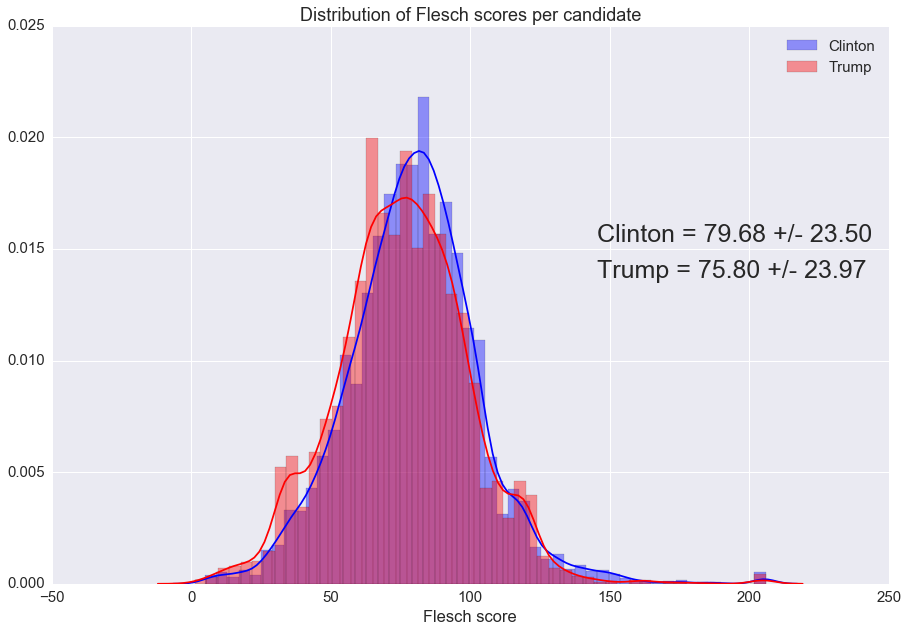

In [513]:
import scipy.stats
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(1,1, figsize = (15,10))
    sns.distplot(hc_flesch, color='b', label='Clinton')
    sns.distplot(dt_flesch[dt_flesch>0], color='r', label='Trump')
    plt.xlabel('Flesch score')
    plt.title("Distribution of Flesch scores per candidate")
    plt.legend()
fig.text(0.63, 0.6, "Clinton = %0.2f +/- %0.2f" %(hc_flesch.mean(), hc_flesch.std()), ha ='left', fontsize = 25)
fig.text(0.63, 0.55, "Trump = %0.2f +/- %0.2f" %(dt_flesch.mean(), dt_flesch.std()), ha ='left', fontsize = 25)
plt.show()

In [520]:
from scipy.stats import ttest_ind

In [521]:
ttest_ind(hc_flesch, dt_flesch)

Ttest_indResult(statistic=8.1475264742744162, pvalue=4.1398872561816746e-16)

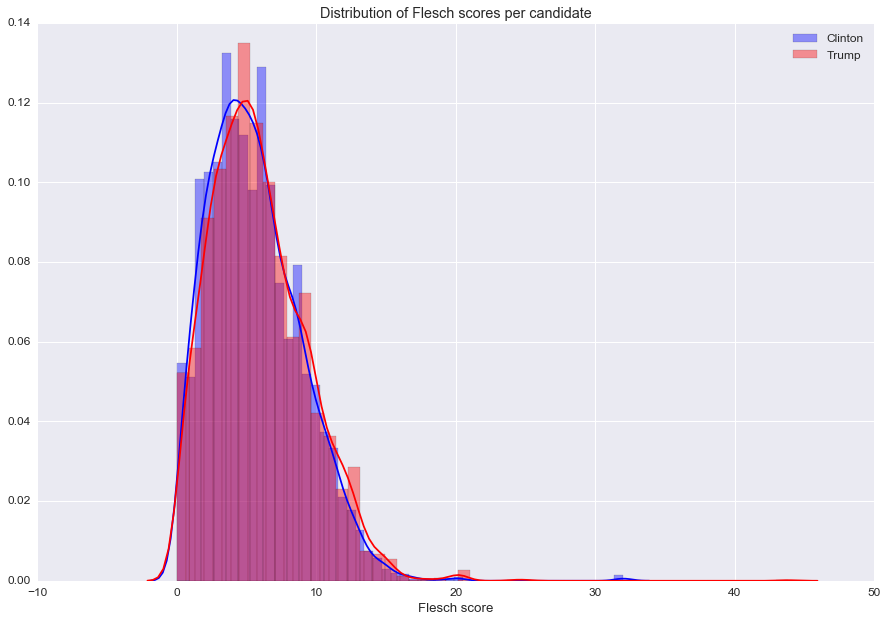

In [494]:
with sns.plotting_context("notebook", font_scale=1.2):
    fig, ax = plt.subplots(1,1, figsize = (15,10))
    sns.distplot(hc_flesch_kin, color='b', label='Clinton')
    sns.distplot(dt_flesch_kin, color='r', label='Trump')
    plt.xlabel('Flesch score')
    plt.title("Distribution of Flesch scores per candidate")
    plt.legend()
plt.show()

In [495]:
dt_flesch_kin.mean()

5.8707049516722929

In [496]:
hc_flesch_kin.mean()

5.5848434263935554